In [1]:
# Data Handling
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:

# Load dataset
df = pd.read_csv("heart.csv")

# Show first few rows
df.head()


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3    0.23  
1   0     3    0.37  
2   0     3    0.24  
3   1     3    0.28  
4   3     2    0.21

In [3]:
# Check dataset shape
print("Dataset Shape:", df.shape)

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Check data types
print("\nData Types:\n", df.dtypes)

# Summary Statistics
df.describe()


Dataset Shape: (1025, 14)

Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Data Types:
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target      float64
dtype: object


age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.536390  
std       0.617755     1.030798     0.620660     0.285822  
min       0.000000     0.000000     0.000000     0.100000  
25%       1.000000     0.000000     2.000000     0.260000  
50%       1.000000     0.000000     2.000000     0.710000  
75%       2.000000     1.000000     3.000000     0.810000  
max       2.000000     4.000000     3.000000     0.900000

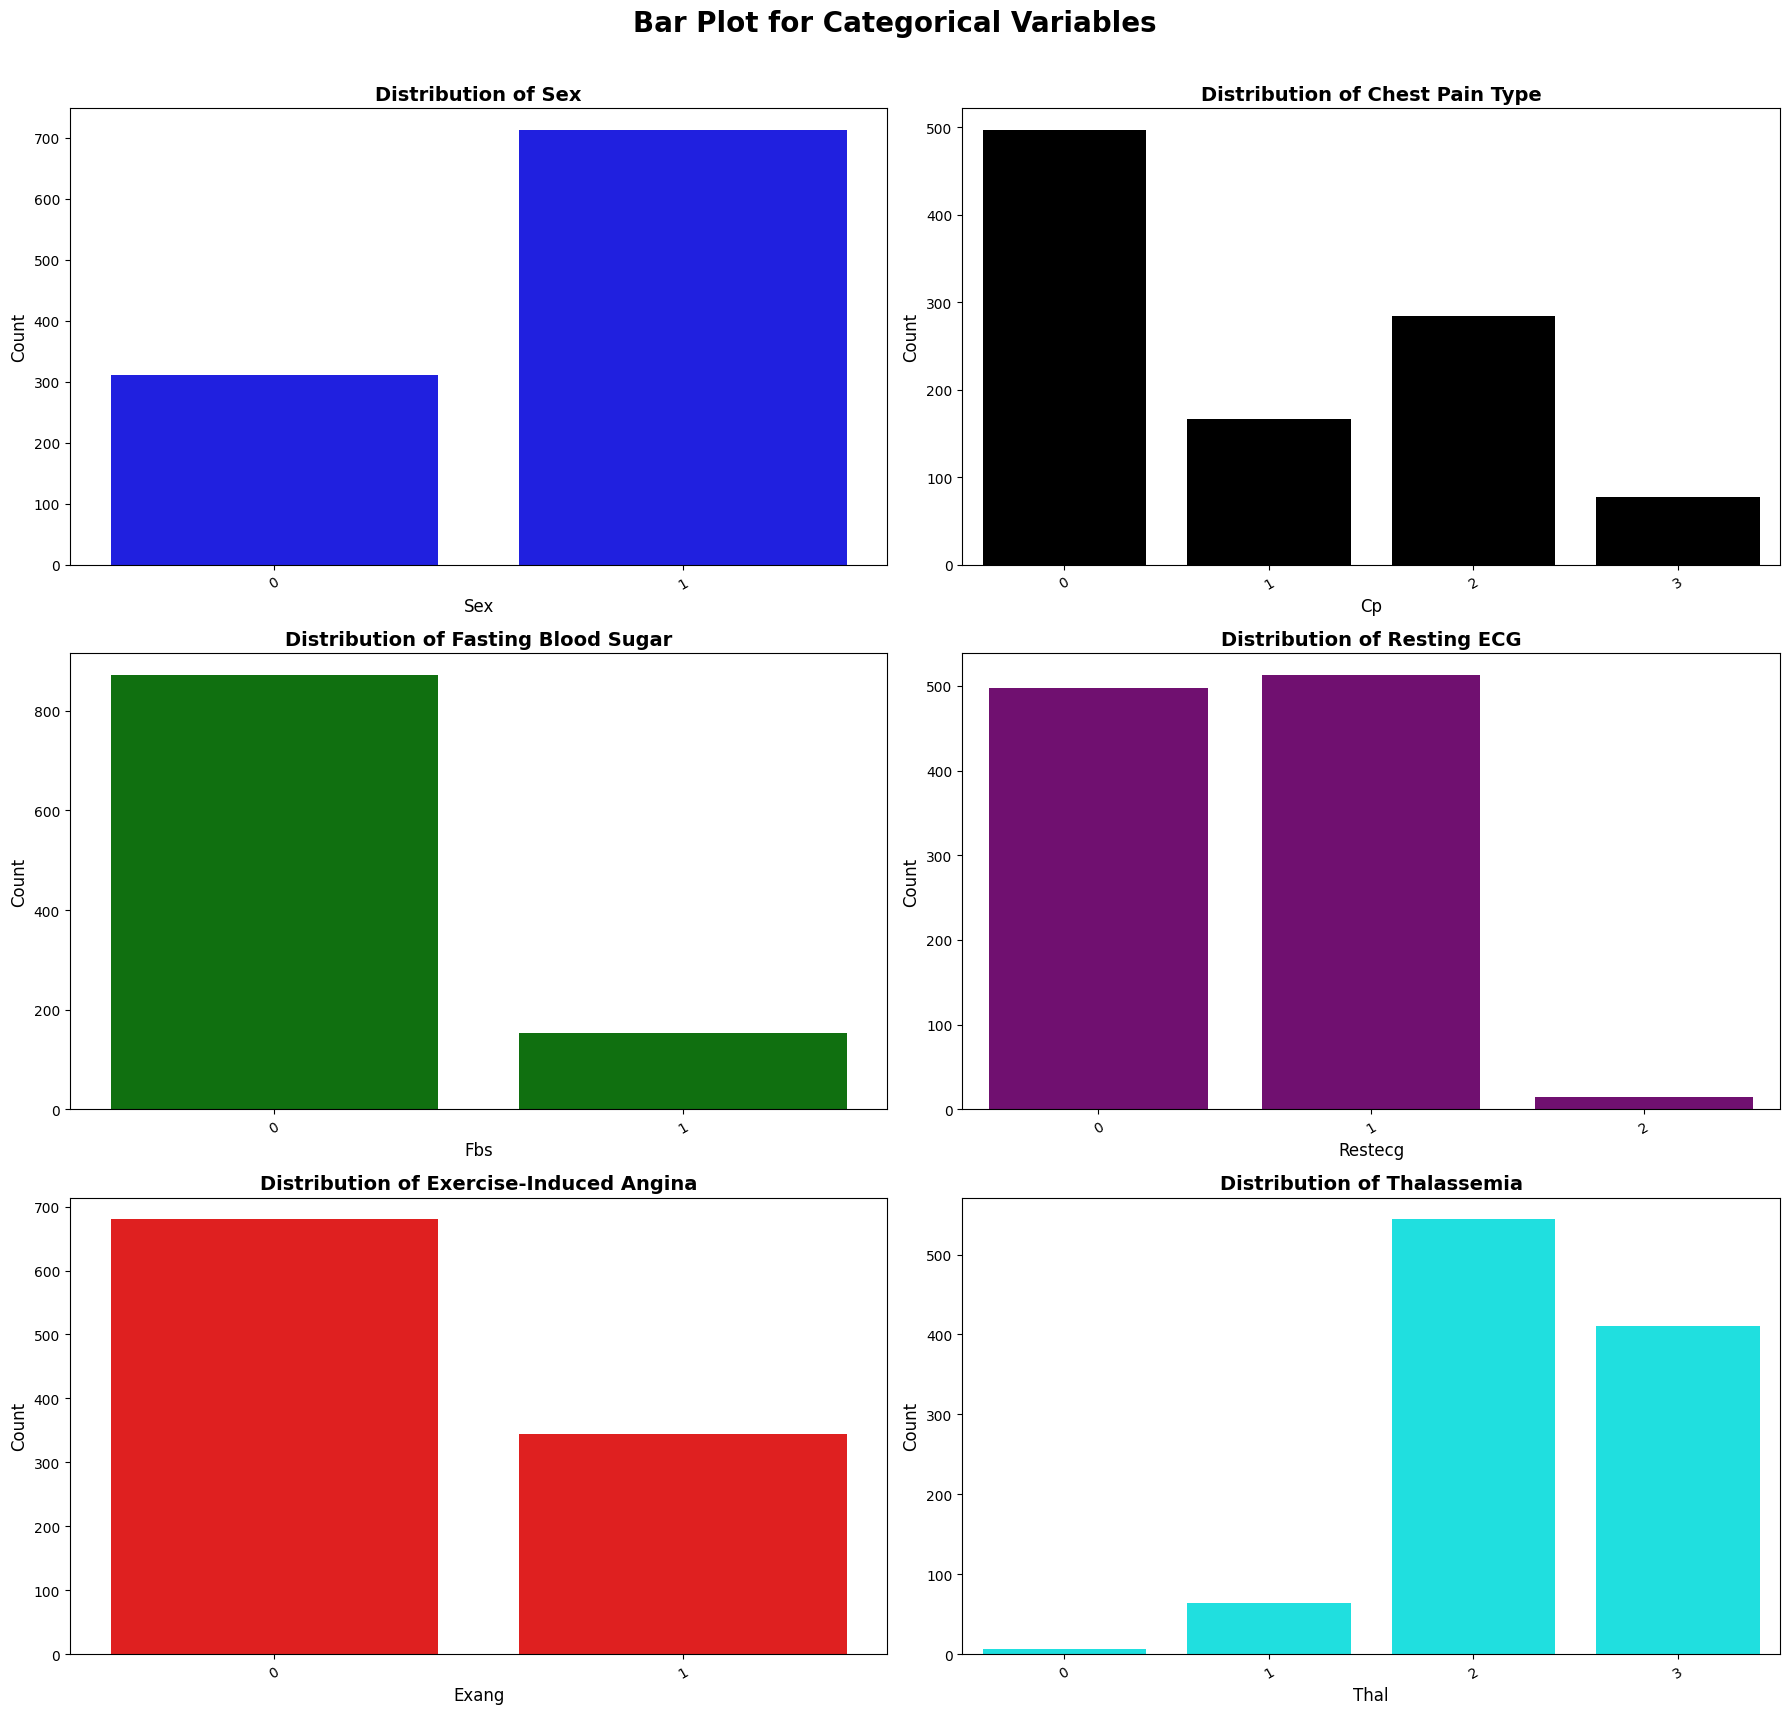

In [4]:
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

# Add a main title for the entire figure
fig.suptitle('Bar Plot for Categorical Variables', fontsize=20, fontweight='bold')

# List of categorical variables and their titles
categories = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'thal']
titles = [
    'Distribution of Sex', 'Distribution of Chest Pain Type',
    'Distribution of Fasting Blood Sugar', 'Distribution of Resting ECG',
    'Distribution of Exercise-Induced Angina', 'Distribution of Thalassemia'
]
colors = ['blue', 'black', 'green', 'purple', 'red', 'cyan']

# Loop through axes and plot
for i, ax in enumerate(axes.flat):  
    sns.countplot(ax=ax, x=categories[i], data=df, color=colors[i])
    ax.set_title(titles[i], fontsize=14, fontweight='bold')  # Set subplot title
    ax.set_xlabel(categories[i].capitalize(), fontsize=12)  # Label x-axis
    ax.set_ylabel('Count', fontsize=12)  # Label y-axis
    ax.tick_params(axis='x', rotation=30)  # Rotate x-axis labels for readability

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.97])  # Prevents overlapping with suptitle

plt.show()


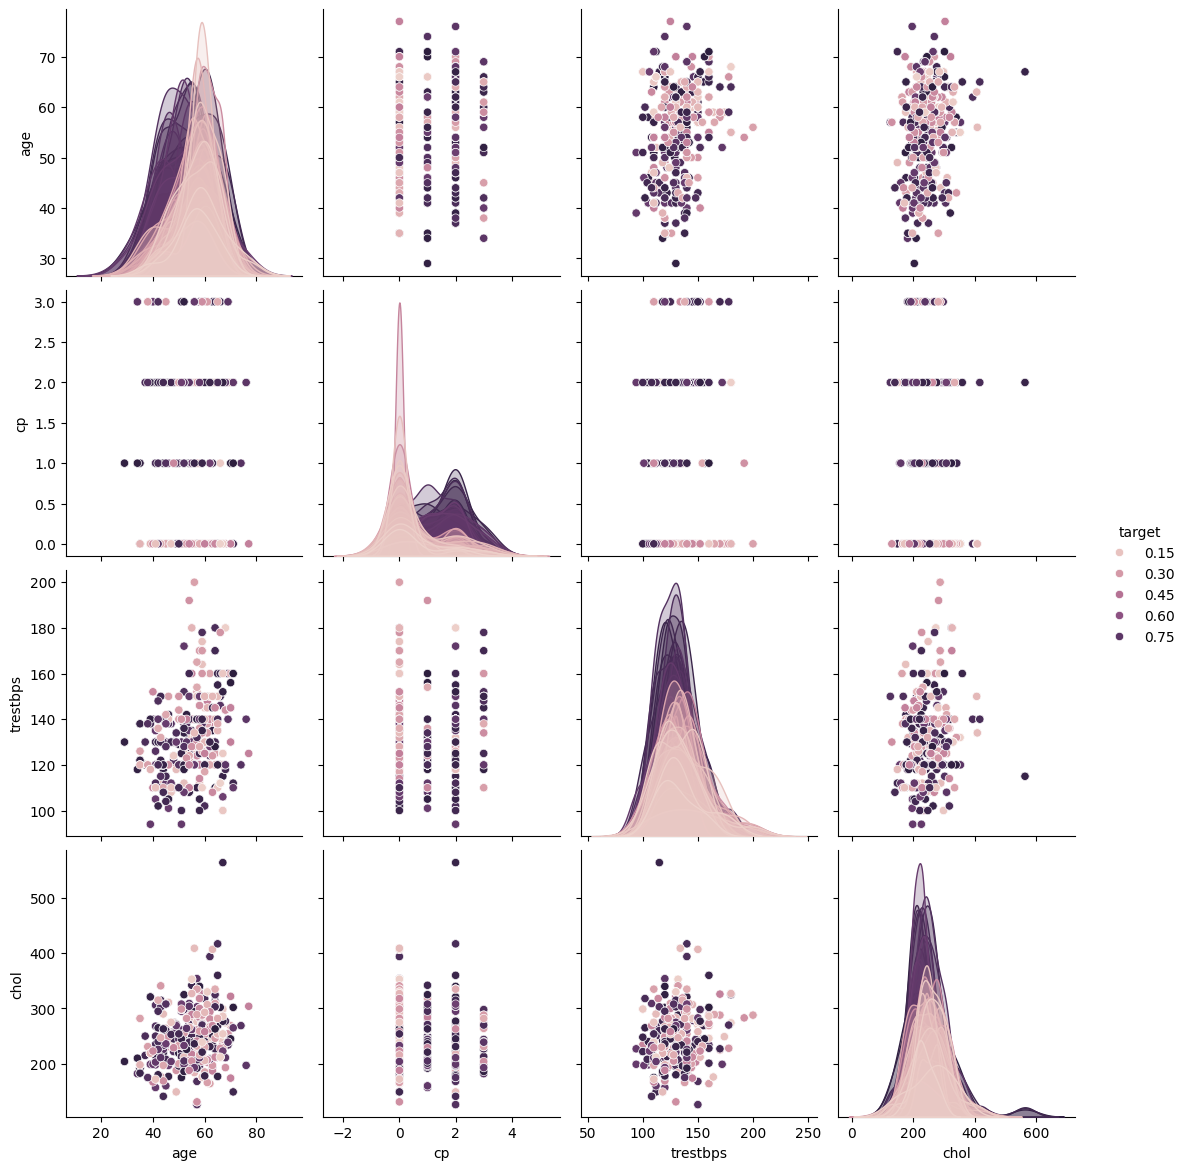

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting specific columns for the pairplot
selected_cols = ["age", "cp", "trestbps", "chol", "target"]  # 'target' as hue
df_selected = df[selected_cols]  

# Creating pairplot with a 5x5 grid
sns.pairplot(df_selected, hue="target", diag_kind="kde")  # KDE for diagonal plots

# Adjusting figure size for better visibility
plt.gcf().set_size_inches(12, 12)  

plt.show()

# 5 cols & 5 row and less number of plots

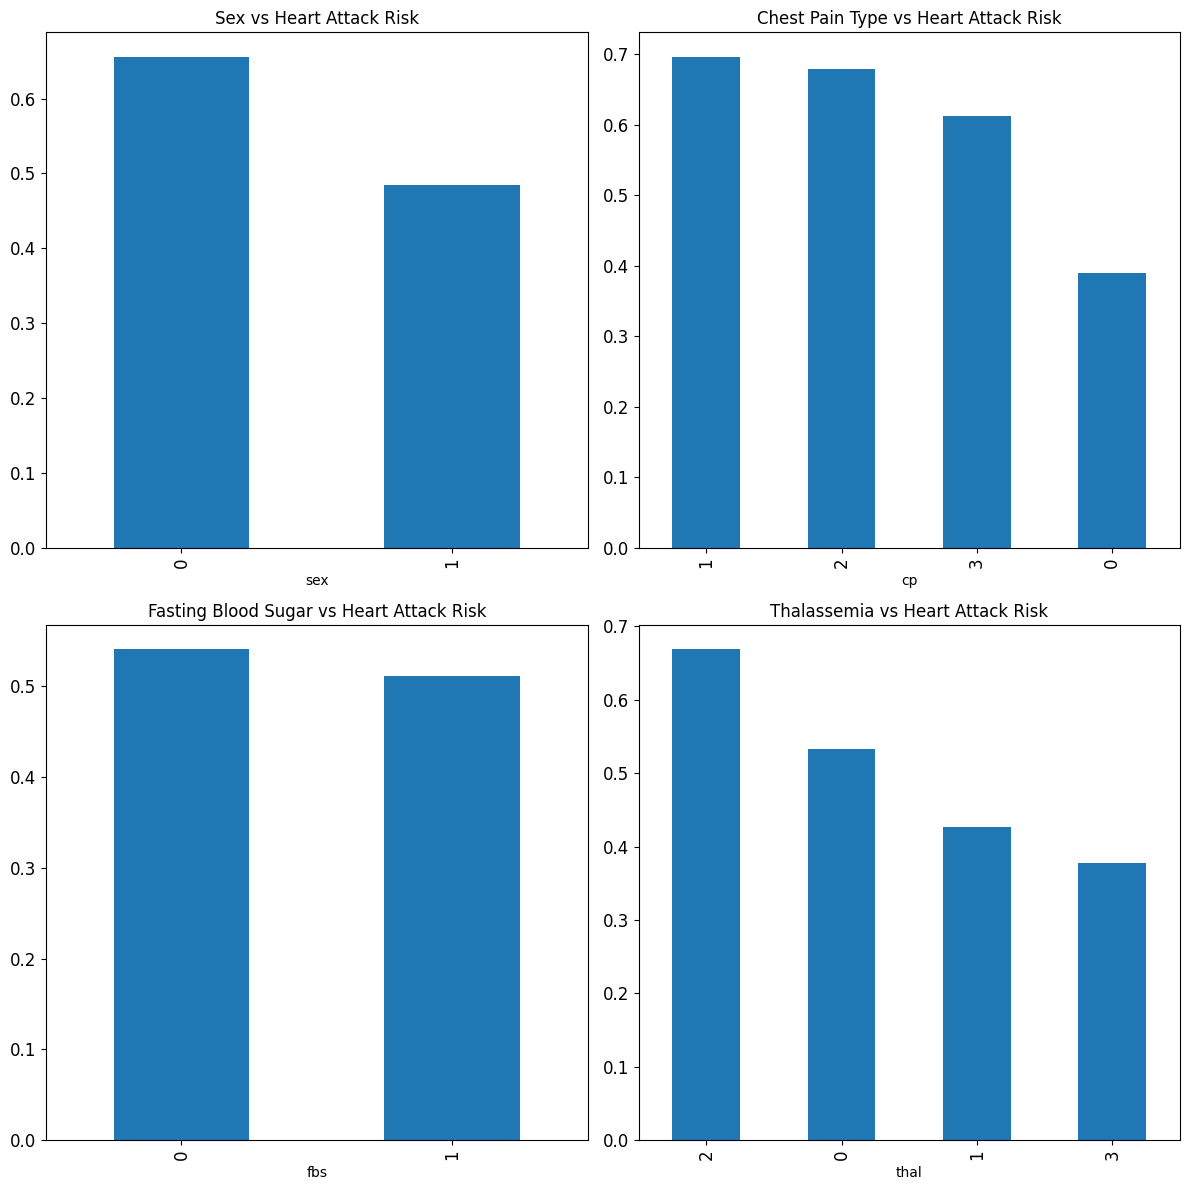

In [6]:
import matplotlib.pyplot as plt

# Create a 2x2 grid instead of 4x2
fig, axarr = plt.subplots(2, 2, figsize=(12, 12))  

df.groupby('sex')['target'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0, 0], fontsize=12)
axarr[0, 0].set_title("Sex vs Heart Attack Risk", fontsize=12)

df.groupby('cp')['target'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0, 1], fontsize=12)
axarr[0, 1].set_title("Chest Pain Type vs Heart Attack Risk", fontsize=12)

df.groupby('fbs')['target'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1, 0], fontsize=12)
axarr[1, 0].set_title("Fasting Blood Sugar vs Heart Attack Risk", fontsize=12)

df.groupby('thal')['target'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1, 1], fontsize=12)
axarr[1, 1].set_title("Thalassemia vs Heart Attack Risk", fontsize=12)

plt.tight_layout()
plt.show()

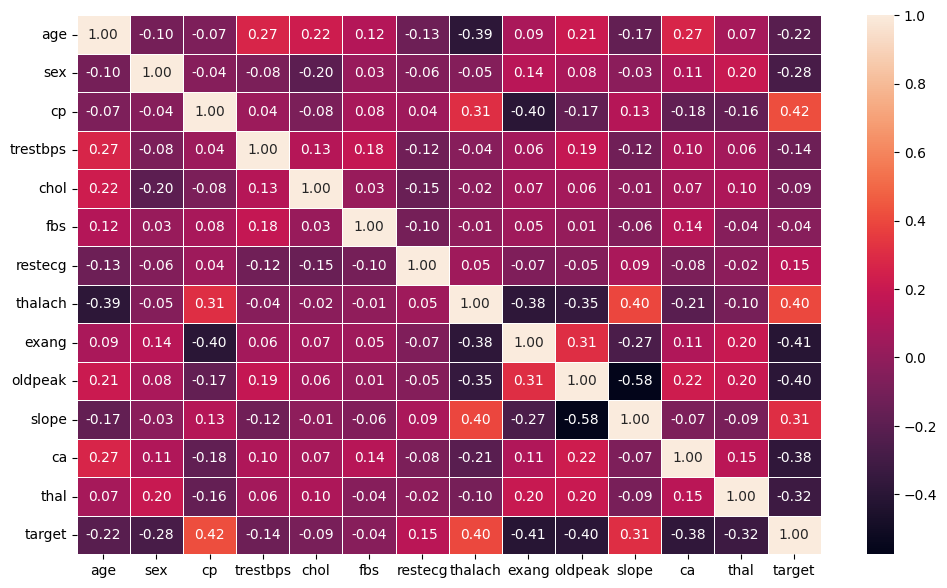

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=0.5)  # Removed cmap
plt.show()


In [8]:
pd.crosstab(df['sex'], df['target'], margins=True)
pd.crosstab(df['cp'], df['target'], margins=True)
pd.crosstab(df['thal'], df['target'], margins=True)


target  0.1  0.11  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19  ...  0.82  \
thal                                                               ...         
0         0     0     0     0     0     0     0     0     0     0  ...     0   
1         2     0     4     1     3     1     2     0     1     1  ...     2   
2         2     4     7     4     7     1     9     5     6     1  ...    25   
3         5     9     9    12    11     6     8    13    11     7  ...     2   
All       9    13    20    17    21     8    19    18    18     9  ...    29   

target  0.83  0.84  0.85  0.86  0.87  0.88  0.89  0.9   All  
thal                                                         
0          1     0     0     0     1     0     0    0     7  
1          2     2     1     1     0     2     0    0    64  
2         25    21    24    22    19    19    25   11   544  
3          5     6     6     8     4     7     5    2   410  
All       33    29    31    31    24    28    30   13  1025  

[5 rows x 53 columns]

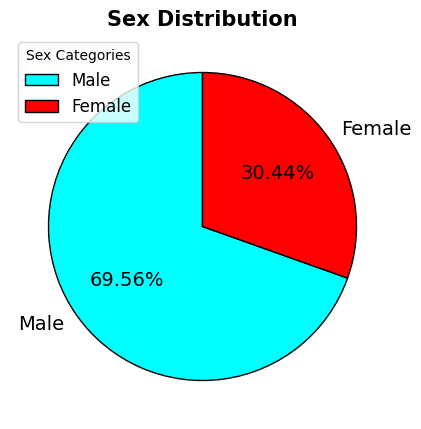

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Define labels for sex categories
sex_labels = ["Male", "Female"]  # Assuming 1 = Male, 0 = Female

# Create the pie chart
plt.figure(figsize=(10, 5))
plt.pie(pd.value_counts(df["sex"]), 
        labels=sex_labels, 
        autopct='%.2f%%', 
        textprops={'fontsize': 14},  # Adjust font size
        colors=["cyan", "red"],  # Custom colors
        startangle=90,  # Start from top
        wedgeprops={'edgecolor': 'black'})  # Add border for clarity

# Title and legend
plt.title('Sex Distribution', fontsize=15, fontweight='bold')
plt.legend(title="Sex Categories", fontsize=12)
plt.show()


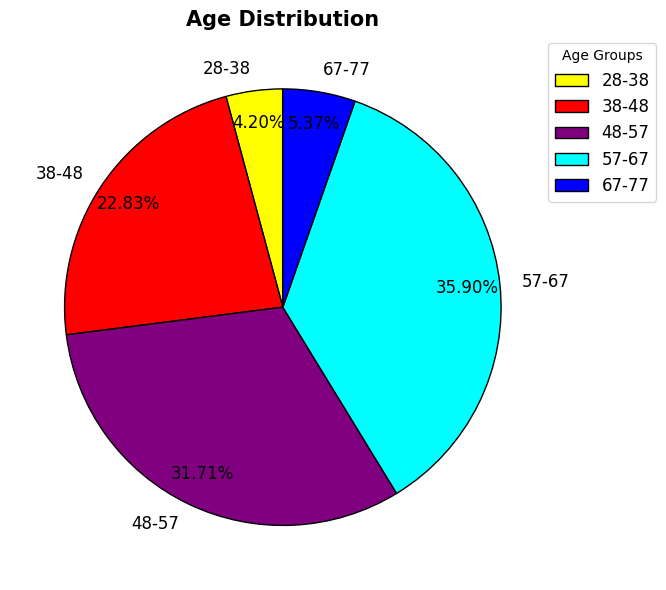

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Group ages into bins for better visualization
age_bins = pd.cut(df["age"], bins=5)  # Adjust bin count if needed

# Count occurrences in each age group
age_counts = age_bins.value_counts().sort_index()

# Create labels for the age groups
age_labels = [f"{int(interval.left)}-{int(interval.right)}" for interval in age_counts.index]

# Create the pie chart
plt.figure(figsize=(10, 6))  # Increase figure size

plt.pie(age_counts, 
        labels=age_labels, 
        autopct='%.2f%%', 
        textprops={'fontsize': 12},  
        colors=["yellow", "red", "purple", "cyan", "blue"],  
        startangle=90,  
        wedgeprops={'edgecolor': 'black'},  
        pctdistance=0.85,  # Moves percentage labels inside slices
        labeldistance=1.1)  # Moves labels away from pie

# Title
plt.title('Age Distribution', fontsize=15, fontweight='bold')

# Move legend outside to prevent overlap
plt.legend(title="Age Groups", fontsize=12, bbox_to_anchor=(1.2, 1))

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()


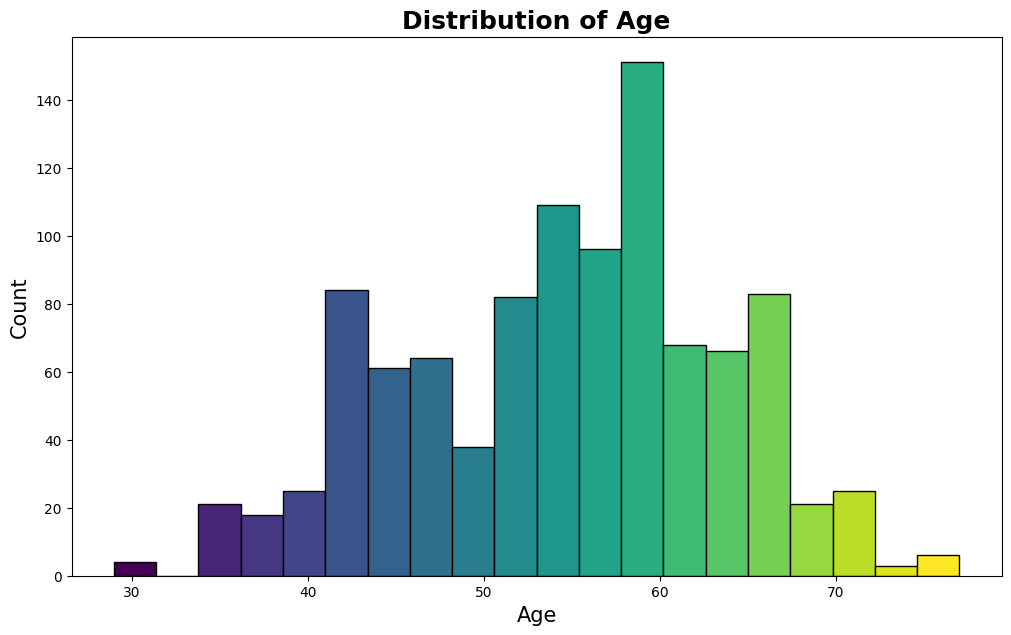

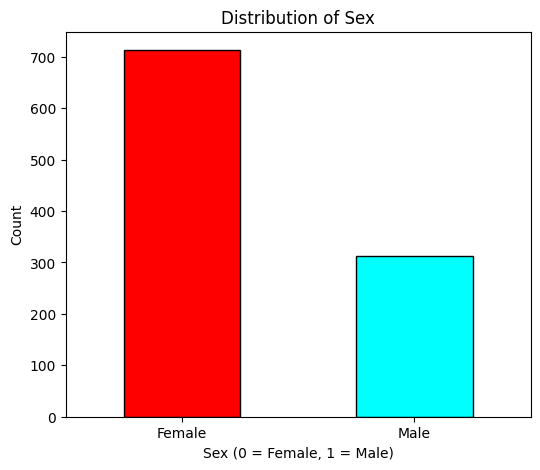

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.figure(figsize=(12, 7))

# Generate histogram data
n, bins, patches = plt.hist(df["age"], bins=20, edgecolor="black")  

# Apply a gradient color theme using colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(patches)))  # Using 'viridis' gradient
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)  # Apply color gradient

# Labels and title
plt.xlabel("Age", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Distribution of Age", fontsize=18, fontweight="bold")

plt.show()


# Distribution of Sex (Use Bar Plot Instead of Histogram)
plt.figure(figsize=(6, 5))
df["sex"].value_counts().plot(kind="bar", color=["red", "cyan"], edgecolor="black")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.title("Distribution of Sex")
plt.xticks(ticks=[0, 1], labels=["Female", "Male"], rotation=0)  # Label 0 & 1 properly
plt.show()


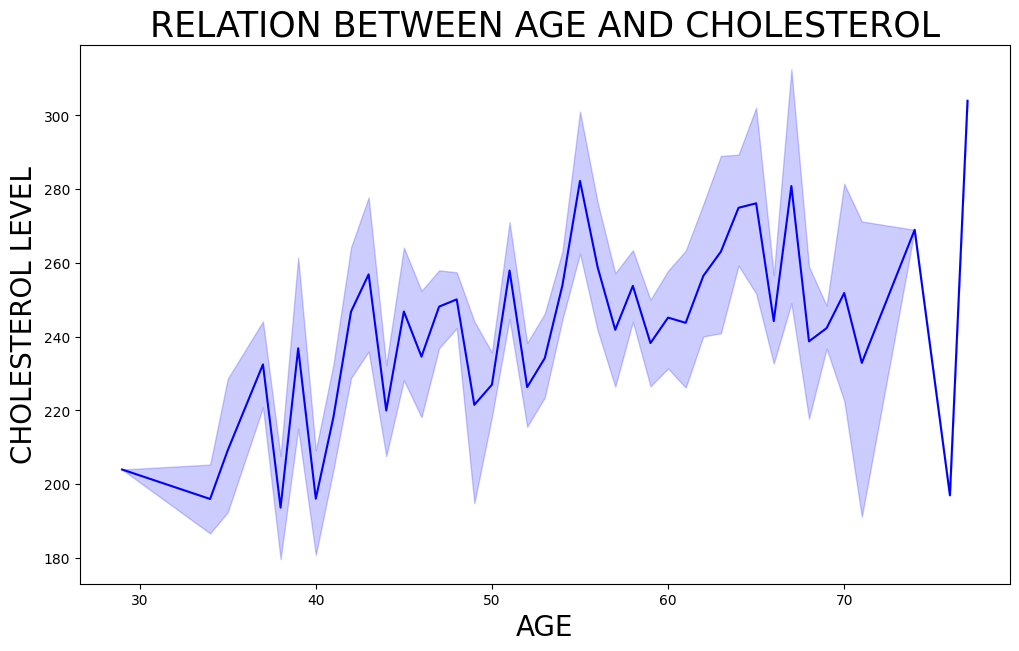

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))

# Line plot of Age vs Cholesterol
sns.lineplot(x='age', y='chol', color='blue', data=df)

# Labels and title
plt.xlabel('AGE', fontsize=20)
plt.ylabel('CHOLESTEROL LEVEL', fontsize=20)
plt.title('RELATION BETWEEN AGE AND CHOLESTEROL', fontsize=25)

plt.show()


In [13]:
# Define features and target
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Fit the regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Model (for regression tasks)
print("Random Forest Regression R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest Regression R2 Score: 0.8300736700449157


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
# Select numerical columns for training
X = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]  # Choose relevant numerical columns
y = df['target']  # Define the target variable
# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)
# Predict on test data
y_pred = linear_model.predict(X_test)
# Calculate R2 Score (how well the model explains variance in data)
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print(f"Linear Regression R2 Score: {r2:.4f}")


Linear Regression R2 Score: 0.1279


In [16]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score



# Define Features and Target
X = df.drop(columns=["target"])  # Assuming "target" is continuous
y = df["target"]

# Split Data into Train & Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Regressor (instead of Classifier)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_r2 = r2_score(y_test, rf_pred)

# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_r2 = r2_score(y_test, lr_pred)

# Choose the Best Model
best_model = rf_model if rf_r2 > lr_r2 else lr_model

# Save the Best Model
joblib.dump(best_model, "best_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print(f"Random Forest R² Score: {rf_r2:.4f}")
print(f"Linear Regression R² Score: {lr_r2:.4f}")
print(f"Best Model Selected: {'Random Forest' if rf_r2 > lr_r2 else 'Linear Regression'}")


Random Forest R² Score: 0.8301
Linear Regression R² Score: 0.3254
Best Model Selected: Random Forest


In [17]:
import os
print(os.getcwd())


c:\Users\Admin\Desktop\SEM 2\Project\AIDAP
